In [1]:
import matplotlib.pyplot as plt
import xarray as xr
import cmocean.cm as cmo
import numpy as np
import my_functions as my
import gsw
from matplotlib.dates import date2num
import matplotlib.dates as mdates
import my_plot_params

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator(interval=1)  # every month
week = mdates.WeekdayLocator(byweekday=mdates.MO, interval=1)
weeks = mdates.WeekdayLocator(byweekday=mdates.MO, interval=3)

yearsFmt = mdates.DateFormatter("%d/%m")

mnthFmt = mdates.DateFormatter("%B")

/Users/marcel/opt/anaconda3/envs/duplessis2021_JGR/lib/python3.9/site-packages/xarray/backends/cfgrib_.py:27: UserWarning: Failed to load cfgrib - most likely there is a problem accessing the ecCodes library. Try `import cfgrib` to get the full error message
  warnings.warn(


In [2]:
import my_plot_params

In [3]:
dat_saz = xr.open_dataset('../data/sg542_saz_L2.nc')
dat_pfz = xr.open_dataset('../data/slocum_pfz_L2.nc')
dat_miz = xr.open_dataset('../data/sg643_miz_L2.nc')

In [4]:
clrs = ['#ff7f00', '#4daf4a', '#377eb8']
name = ['SAZ', 'PFZ', 'MIZ']

## Figure 2

/var/folders/n5/s6yw8y811f7bqlr9nb7w5rsr0000gn/T/ipykernel_92878/540724985.py:3: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.subplots_adjust(hspace=0.4, wspace=0.4)


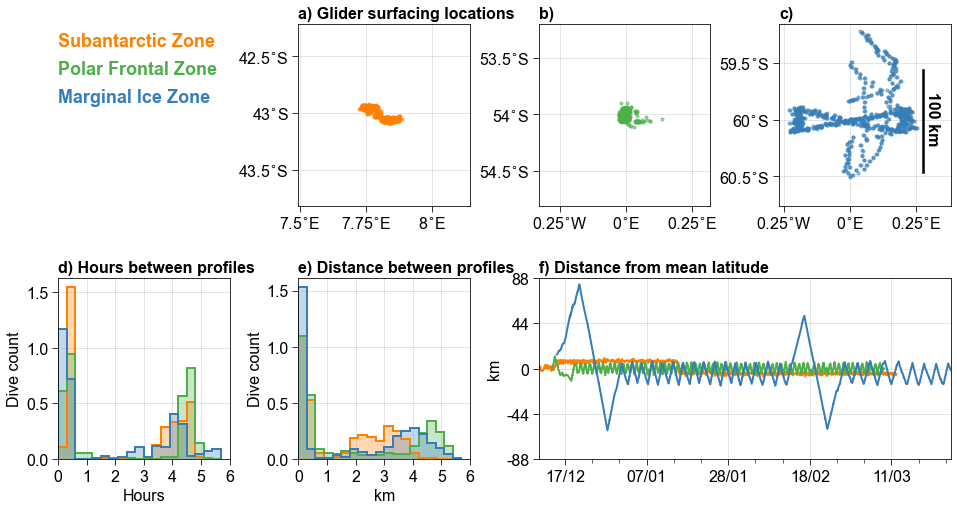

In [5]:
fig = plt.figure(figsize=[16, 8], constrained_layout=True)
gs  = fig.add_gridspec(2, 4)
fig.subplots_adjust(hspace=0.4, wspace=0.4)


axa = fig.add_subplot(gs[1, 0]) # hours between profiles

for i, dat in enumerate([dat_saz, dat_pfz, dat_miz]):

    t = np.diff(date2num(dat.time.values))*24 # get time from minutes to hours
    
    axa.hist(t, 
             bins=np.arange(0, 6, 0.3),
             histtype='bar',
             alpha=0.3,
             facecolor=clrs[i],
             density=True,
             label=name[i]
            )
    
    axa.hist(t, 
             bins=np.arange(0, 6, 0.3),
             histtype='step',
             lw=2,
             edgecolor=clrs[i],
             density=True
            )
    
axa.xaxis.set_ticks(np.arange(0, 7, 1))
axa.grid(lw=0.5, c='0.6', ls='--')
axa.set_xlabel('Hours')
axa.set_xlim(0, 6)
axa.set_ylabel('Dive count')


axc = fig.add_subplot(gs[0, 1])

dat=dat_saz

axc.scatter(dat.lon, dat.lat, c=clrs[0], s=10, alpha=0.5, zorder=10)
axc.set_xlim(dat.lon.median()-0.325, dat.lon.median()+0.325)
axc.set_ylim(dat.lat.mean()-0.8, dat.lat.mean()+0.8)

axc.xaxis.set_ticks([7.5, 7.75, 8])
axc.xaxis.set_ticklabels(['7.5$^{\circ}$E', '7.75$^{\circ}$E', '8$^{\circ}$E'])

axc.yaxis.set_ticks([-43.5, -43, -42.5])
axc.yaxis.set_ticklabels(['43.5$^{\circ}$S', '43$^{\circ}$S', '42.5$^{\circ}$S'])


axd = fig.add_subplot(gs[0, 2])
dat=dat_pfz
axd.scatter(dat.lon, dat.lat, c=clrs[1], s=10, alpha=0.5, zorder=10)
axd.set_xlim(dat.lon.median()-0.325, dat.lon.median()+0.325)
axd.set_ylim(dat.lat.mean()-0.8, dat.lat.mean()+0.8)

axd.xaxis.set_ticks([-0.25, 0, 0.25])
axd.xaxis.set_ticklabels(['0.25$^{\circ}$W', '0$^{\circ}$E', '0.25$^{\circ}$E'])

axd.yaxis.set_ticks([-54.5, -54, -53.5])
axd.yaxis.set_ticklabels(['54.5$^{\circ}$S', '54$^{\circ}$S', '53.5$^{\circ}$S'])


axe = fig.add_subplot(gs[0, 3])
dat=dat_miz
axe.scatter(dat.lon, dat.lat, c=clrs[2], s=10, alpha=0.5, zorder=10)
axe.set_xlim(dat.lon.median()-0.325, dat.lon.median()+0.325)
axe.set_ylim(dat.lat.mean()-0.8, dat.lat.mean()+0.8)

axe.xaxis.set_ticks([-0.25, 0, 0.25])
axe.xaxis.set_ticklabels(['0.25$^{\circ}$W', '0$^{\circ}$E', '0.25$^{\circ}$E'])

axe.yaxis.set_ticks([-60.5, -60, -59.5])
axe.yaxis.set_ticklabels(['60.5$^{\circ}$S', '60$^{\circ}$S', '59.5$^{\circ}$S'])

axe.plot([0.275, 0.275], [-60.46, -59.56], c='k', lw=2.5)

axe.text(0.285, -60.2, '100 km', rotation=-90,
           fontweight='bold')


axb = fig.add_subplot(gs[1, 1]) # distance between the profiles

for i, dat in enumerate([dat_saz, dat_pfz, dat_miz]):

    d = gsw.distance(dat.lon.values, dat.lat.values)/1000
    
    axb.hist(d, 
           bins=np.arange(0, 6, 0.3),
           histtype='bar',
           alpha=0.3,
           facecolor=clrs[i],
           density=True
          )   
    
    axb.hist(d, 
               bins=np.arange(0, 6, 0.3),
               histtype='step',
               lw=2,
               edgecolor=clrs[i],
               density=True
              )
    
axb.xaxis.set_ticks(np.arange(0, 7, 1))
axb.set_xlabel('km')
axb.set_xlim(0, 6)
axb.set_ylabel('Dive count')


axf = fig.add_subplot(gs[1, 2:])

for i, dat in enumerate([dat_saz, dat_pfz, dat_miz]):
    
    axf.plot(dat.time, 
             dat.lat-dat.lat.mean(), # mean latitude of the gliders
             c=clrs[i],
             label=name[i],
             lw=2
            )
    
axf.yaxis.set_ticks(np.arange(-0.8, 1.2, 0.1))

text_props = dict(ha='center', va='center', fontweight='bold', fontsize=16)
props_saz = dict(boxstyle='round', alpha=1, pad=0.1, facecolor='w', edgecolor=clrs[0])
props_pfz = dict(boxstyle='round', alpha=1, pad=0.1, facecolor='w', edgecolor=clrs[1])
props_miz = dict(boxstyle='round', alpha=1, pad=0.1, facecolor='w', edgecolor=clrs[2])

d=gsw.distance([0, 0],
               [-60,-60.4]
              )[0] / 1000

d=int(np.round(d,0))

axf.yaxis.set_ticks(np.arange(-0.8, 1.2, 0.4))
axf.yaxis.set_ticklabels([-d*2, -d, 0, d, d*2])

axf.xaxis.set_major_locator(weeks)
axf.xaxis.set_minor_locator(week)
axf.xaxis.set_major_formatter(yearsFmt)

axf.set_ylabel('km')

axf.set_ylim(-0.8, 0.8)

axf.set_xlim(dat_saz.time.values[0], dat_miz.time.values[-1])

for a in [axa, axb, axc, axd, axe, axf]:
    a.grid(lw=0.5, c='0.6', ls='-', alpha=0.5)
    
axa.set_title('d) Hours between profiles',      loc='left', fontweight='bold', fontsize=16)
axb.set_title('e) Distance between profiles',   loc='left', fontweight='bold', fontsize=16)
axc.set_title('a) Glider surfacing locations',  loc='left', fontweight='bold', fontsize=16)
axd.set_title('b)',                             loc='left', fontweight='bold', fontsize=16)
axe.set_title('c)',                             loc='left', fontweight='bold', fontsize=16)
axf.set_title('f) Distance from mean latitude', loc='left', fontweight='bold', fontsize=16)

axa.text(0, 3.70,  'Subantarctic Zone', c=clrs[0], fontsize=18, fontweight='bold')
axa.text(0, 3.45, 'Polar Frontal Zone', c=clrs[1], fontsize=18, fontweight='bold')
axa.text(0, 3.2,  'Marginal Ice Zone', c=clrs[2], fontsize=18, fontweight='bold')

plt.savefig('../figs_submission2/fig2.png', dpi=300, bbox_inches='tight')

In [6]:
from matplotlib.dates import date2num

for i, dat in enumerate([dat_saz, dat_pfz, dat_miz]):

    d = gsw.distance(dat.lon.values, dat.lat.values)/1000
    t = np.diff(date2num(dat.time.values))*24
    
    print('distance ' + str(np.mean(d)))
    print('time ' + str(np.mean(t)))
    print('')

distance 1.5635142570824452
time 2.2926280719972096

distance 2.023977610925672
time 2.45615435795068

distance 1.957310283070805
time 2.4866964894341894



In [7]:
dat_miz_west = dat_miz.isel(time=((dat_miz.lon < -0.175) & (dat_miz.lat<-59.8)))
dat_miz_east = dat_miz.isel(time=((dat_miz.lon >  0.175) & (dat_miz.lat<-59.8)))

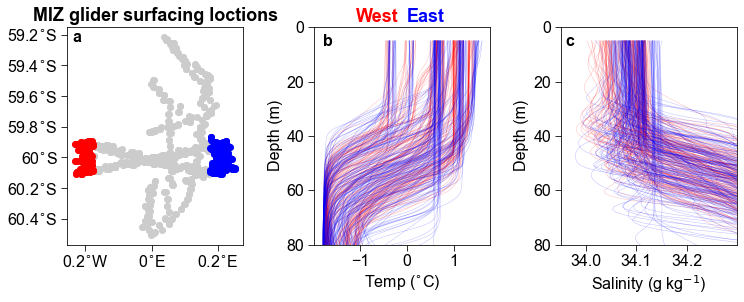

In [25]:
fig,ax=plt.subplots(1,3, figsize=[12, 4])
fig.subplots_adjust(wspace=0.4)

ax[0].scatter(dat_miz.lon, dat_miz.lat, c='0.8')
ax[0].scatter(dat_miz_west.lon, dat_miz_west.lat, c='r')
ax[0].scatter(dat_miz_east.lon, dat_miz_east.lat, c='b')

ax[1].plot(dat_miz_west.temp, dat_miz_west.depth, c='r', alpha=0.25, lw=0.5)
ax[1].plot(dat_miz_east.temp, dat_miz_east.depth, c='b', alpha=0.25, lw=0.5)
ax[1].set_ylim(80,0)

ax[2].plot(dat_miz_west.salt, dat_miz_west.depth, c='r', alpha=0.25, lw=0.5)
ax[2].plot(dat_miz_east.salt, dat_miz_east.depth, c='b', alpha=0.25, lw=0.5)
ax[2].set_ylim(80,0)

ax[1].set_ylabel('Depth (m)')
ax[2].set_ylabel('Depth (m)')

ax[1].set_xlabel('Temp ($^{\circ}$C)')
ax[2].set_xlabel('Salinity (g kg$^{-1}$)')

ax[1].text(-1.1, -2, 'West', c='r', fontsize=18, fontweight='bold')
ax[1].text(0.0 , -2, 'East', c='b', fontsize=18, fontweight='bold')

ax[2].set_xlim(33.95, 34.3)
ax[2].xaxis.set_ticks(np.arange(34, 34.3, 0.1))

ax[0].set_title('MIZ glider surfacing loctions', fontsize=18, fontweight='bold')

ax[0].text(-0.24,  -59.25, 'a', fontweight='bold')
ax[1].text(-1.8,  7, 'b', fontweight='bold')
ax[2].text(33.96, 7, 'c', fontweight='bold')

ax[0].xaxis.set_ticks([-0.2, 0, 0.2])
ax[0].xaxis.set_ticklabels(['0.2$^{\circ}$W', '0$^{\circ}$E', '0.2$^{\circ}$E'])

ax[0].yaxis.set_ticks([-60.4, -60.2, -60, -59.8, -59.6, -59.4, -59.2])
ax[0].yaxis.set_ticklabels(['60.4$^{\circ}$S', '60.2$^{\circ}$S', '60$^{\circ}$S',
                           '59.8$^{\circ}$S', '59.6$^{\circ}$S', '59.4$^{\circ}$S', '59.2$^{\circ}$S'])

plt.savefig('../figs_submission2/figS4.png', dpi=300, bbox_inches='tight')